# Ramdom Forest Example

## Prepare Data

In [39]:
# Common imports
import numpy as np
import os

# To plot pretty figures
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

#Load data
iris = load_iris()

In [40]:
#Split data
X = iris.data[:, 2:]
y = iris.target

X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.10)
print(X_train)
print(y_train)

[[1.7 0.3]
 [5.3 1.9]
 [1.9 0.4]
 [3.5 1. ]
 [1.4 0.2]
 [5.1 1.5]
 [1.5 0.4]
 [1.5 0.4]
 [1.6 0.2]
 [4.9 1.8]
 [1.4 0.2]
 [1.2 0.2]
 [1.  0.2]
 [1.4 0.2]
 [4.5 1.5]
 [4.4 1.4]
 [3.3 1. ]
 [1.4 0.2]
 [1.4 0.3]
 [4.1 1. ]
 [6.6 2.1]
 [3.7 1. ]
 [1.3 0.2]
 [1.3 0.4]
 [4.7 1.4]
 [4.1 1.3]
 [5.1 1.9]
 [1.5 0.2]
 [1.3 0.2]
 [5.6 1.8]
 [1.6 0.6]
 [4.5 1.3]
 [4.4 1.4]
 [1.6 0.2]
 [4.9 1.5]
 [3.9 1.2]
 [1.5 0.2]
 [5.6 2.4]
 [5.4 2.3]
 [4.  1.3]
 [6.7 2. ]
 [1.4 0.3]
 [5.8 1.6]
 [4.2 1.2]
 [5.1 2. ]
 [4.4 1.3]
 [5.6 1.4]
 [1.6 0.4]
 [3.9 1.1]
 [1.3 0.2]
 [1.2 0.2]
 [3.6 1.3]
 [1.3 0.3]
 [4.8 1.8]
 [1.1 0.1]
 [6.4 2. ]
 [1.4 0.1]
 [3.  1.1]
 [5.  2. ]
 [1.3 0.3]
 [4.5 1.5]
 [5.6 2.1]
 [1.5 0.1]
 [5.8 2.2]
 [3.3 1. ]
 [5.1 2.3]
 [4.9 1.5]
 [4.  1.3]
 [1.5 0.2]
 [1.7 0.5]
 [3.9 1.4]
 [1.5 0.2]
 [4.9 1.8]
 [4.6 1.5]
 [1.3 0.2]
 [5.4 2.1]
 [1.5 0.2]
 [4.5 1.7]
 [6.1 1.9]
 [1.5 0.1]
 [5.9 2.1]
 [4.1 1.3]
 [4.6 1.4]
 [5.  1.9]
 [1.9 0.2]
 [6.1 2.3]
 [4.5 1.6]
 [5.  1.7]
 [5.3 2.3]
 [6.3 1.8]
 [1.7 0.4]

## Decision Tree
To compare, we first analyse data with a normal Decision Tree

In [41]:
#Define and fit Decision Tree
#hyper parameter max depth
tree_clf = DecisionTreeClassifier(max_depth = 3)
tree_clf.fit(X_train,y_train)

print("tree classiefier configuration")
tree_clf

tree classiefier configuration


DecisionTreeClassifier(max_depth=3)

In [42]:
#Calculate Accuracy
from sklearn.metrics import accuracy_score

y_pred_rf= tree_clf.predict(X_test)
print("tree score", accuracy_score(y_test, y_pred_rf))

tree score 0.8666666666666667


In [43]:
#make prediction

print(""" class 0 is Iris Setosa
 class 1 is Iris Versicolor
 class 2 is Iris Virginica
 """)

#Calculate probability for each class
probs = tree_clf.predict_proba([[5, 1.5]])
print("probability of class for query",[[5, 1.5]],probs)

#Select best guess/prediction
pred =  tree_clf.predict([[5, 1.5]])
print("prediction of class for query",[[5, 1.5]],pred)


 class 0 is Iris Setosa
 class 1 is Iris Versicolor
 class 2 is Iris Virginica
 
probability of class for query [[5, 1.5]] [[0.         0.97727273 0.02272727]]
prediction of class for query [[5, 1.5]] [1]


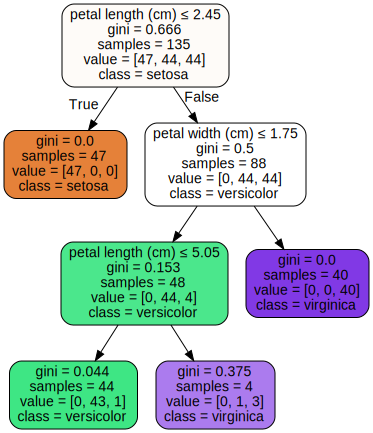

In [44]:
#Graph decision tree
from sklearn import tree
import graphviz

# dot is a graph description language
dot = tree.export_graphviz(tree_clf, out_file=None, 
                           feature_names=iris.feature_names[2:],
                           class_names=iris.target_names,
                           filled=True, rounded=True,  
                           special_characters=True) 

# we create a graph from dot source using graphviz.Source
graph = graphviz.Source(dot) 
graph


## Random Forest
We now analyse the same data using a Random Forest

In [45]:
#Define and fit Random Forest
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
#n_estimators is the number of trees in the forest
#n_jobs is the number of jobs to run in parallel
rnd_clf = RandomForestClassifier(n_estimators=10, max_leaf_nodes=16, n_jobs=-1, random_state=42)
rnd_clf.fit(X_train, y_train)
rnd_clf


RandomForestClassifier(max_leaf_nodes=16, n_estimators=10, n_jobs=-1,
                       random_state=42)

In [46]:
#Calculate accuracy
y_pred_rf= rnd_clf.predict(X_test)
print("random forest", accuracy_score(y_test, y_pred_rf))


random forest 0.8666666666666667


In [47]:
#make prediction

print(""" class 0 is Iris Setosa
 class 1 is Iris Versicolor
 class 2 is Iris Virginica
 """)

probs = rnd_clf.predict_proba([[5, 1.5]])
print("probability of class for query",[[5, 1.5]],probs)

pred =  rnd_clf.predict([[5, 1.5]])
print("prediction of class for query",[[5, 1.5]],pred)

 class 0 is Iris Setosa
 class 1 is Iris Versicolor
 class 2 is Iris Virginica
 
probability of class for query [[5, 1.5]] [[0.  0.8 0.2]]
prediction of class for query [[5, 1.5]] [1]


In [48]:
#Number of trees in the random forest
print(len(rnd_clf.estimators_))

10


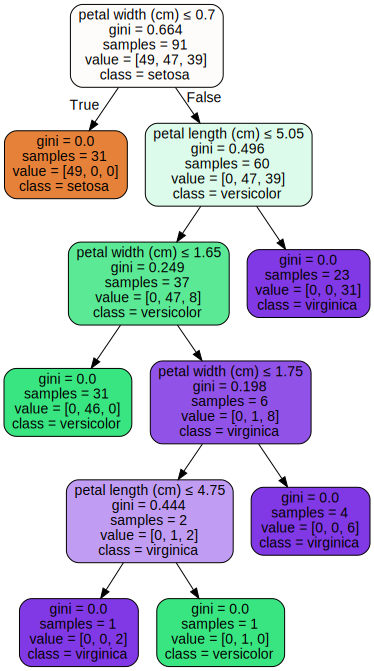

In [49]:
#Graph one of the trees in the forest
from sklearn import tree
import graphviz

# dot is a graph description language
dot = tree.export_graphviz(rnd_clf.estimators_[0], #First tree in the random forest
                           out_file=None, 
                           feature_names=iris.feature_names[2:],
                           class_names=iris.target_names,
                           filled=True, rounded=True,  
                           special_characters=True) 

# we create a graph from dot source using graphviz.Source
graph = graphviz.Source(dot) 
graph